In [1]:
### Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

salaries_csv_path = "Data/Salaries.csv"
fielding_csv_path = "Data/Fielding.csv"
batting_csv_path = "Data/Batting.csv"

#read CSV files in Dataframes and merge data
salaries_df =  pd.read_csv(salaries_csv_path)
fielding_df = pd.read_csv(fielding_csv_path)
batting_df = pd.read_csv(batting_csv_path)
fielding_df = fielding_df[['playerID','POS']]
new_df = salaries_df.merge(fielding_df,on='playerID',)
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [2]:
#Filter data to display salary info
summary_table1 = new_df.groupby(['yearID', 'lgID','POS'])
summary_table1 = summary_table1.mean()['salary']
summary_table1 = pd.DataFrame(summary_table1)
summary_table1= summary_table1.unstack()
summary_table1= summary_table1.unstack()
summary_table1 = summary_table1.droplevel(level=0,axis=1)
summary_table1.columns
position_list = ['1B', '2B', '3B', 'C', 'CF', 'DH', 'LF', 'OF', 'P', 'RF', 'SS']
summary_table1.head()

POS                1B                            2B                 \
lgID               AL             NL             AL             NL   
yearID                                                               
1985    557601.694277  574147.365449  451312.877358  430630.261682   
1986    487551.877892  551909.780250  405508.648221  413178.239700   
1987    511526.566230  502736.476462  371450.990826  401539.733871   
1988    591857.294606  528764.076453  386929.327138  457059.451306   
1989    607072.194751  631161.318052  471015.141544  424119.172549   

POS                3B                             C                 \
lgID               AL             NL             AL             NL   
yearID                                                               
1985    507746.765766  551901.101786  475249.103261  647907.071161   
1986    469377.539611  532579.837139  378316.376494  545142.032787   
1987    494601.986907  443285.521739  409420.027248  534426.049875   
1988    546459.545994  502643.725314  365655.626536  494261.466523   
1989    605034.334298  418612.166384  475870.716702  460528.479319   

POS                CF                 ...             LF                 \
lgID               AL             NL  ...             AL             NL   
yearID                                ...                                 
1985    535140.963816  490661.231054  ...  522034.029833  465700.882503   
1986    558351.214599  430669.194825  ...  518082.639463  459362.409701   
1987    569155.657938  447085.345902  ...  507116.530963  428600.954913   
1988    491810.109756  572403.141397  ...  491315.983278  502473.289598   
1989    579398.619847  625675.300462  ...  578750.630573  552851.862069   

POS                OF                             P                 \
lgID               AL             NL             AL             NL   
yearID                                                               
1985    547028.616776  510411.962399  474795.096955  538441.599196   
1986    537564.852210  491634.426626  412833.307901  511908.228402   
1987    547724.277475  483097.859967  479010.834856  501806.725973   
1988    542428.311708  574005.074742  529113.720514  508016.227326   
1989    610090.933896  645003.699683  587932.188889  592837.327660   

POS                RF                            SS                 
lgID               AL             NL             AL             NL  
yearID                                                              
1985    515240.657143  492276.685007  426367.236715  544369.215881  
1986    490904.831868  494408.636574  405590.923828  427764.868762  
1987    490591.503098  507342.754430  438200.995192  407461.483539  
1988    496717.992072  575836.395161  467921.938976  491925.304933  
1989    543795.105490  645773.455000  558702.608779  483153.061224  

[5 rows x 22 columns]

In [3]:
#Find the difference of AL vs NL salaries for position players vs. pitchers
difference_table = []
difference_df = pd.DataFrame(difference_table)
working_df = []
for position in position_list:
    working_table = summary_table1[position]
    working_df = pd.DataFrame(working_table)
    working_df
    difference_df[position] = working_df['AL']-working_df['NL'] 
    #working_table.drop(columns=['AL','NL'])
    print(f'{position} complete!')
difference_df.columns



1B complete!
2B complete!
3B complete!
C complete!
CF complete!
DH complete!
LF complete!
OF complete!
P complete!
RF complete!
SS complete!


Index(['1B', '2B', '3B', 'C', 'CF', 'DH', 'LF', 'OF', 'P', 'RF', 'SS'], dtype='object')

In [4]:
#find the salary difference for each position and combine all position players
difference_df['Position Players Average'] = 0

position_players = ['1B', '2B', '3B', 'C', 'CF', 'LF', 'OF', 'RF', 'SS']
for position in position_players:
    difference_df['Position Players Average'] += difference_df[position]
difference_df['Position Players Average']=difference_df['Position Players Average']/9


In [5]:
difference_df.head()


,1B,2B,3B,C,CF,DH,LF,OF,P,RF,SS,Position Players Average
yearID,,,,,,,,,,,,
1985,-16545.671171,20682.615676,-44154.336020,-172657.967900,44479.732762,103499.346463,56333.147330,36616.654377,-63646.502241,22963.972136,-118001.979166,-18920.425775
1986,-64357.902358,-7669.591479,-63202.297527,-166825.656293,127682.019774,105941.950739,58720.229762,45930.425584,-99074.920501,-3503.804706,-22173.944933,-10600.058020
1987,8790.089768,-30088.743045,51316.465168,-125006.022627,122070.312036,183688.518624,78515.576050,64626.417508,-22795.891116,-16751.251332,30739.511653,20468.039464
1988,63093.218153,-70130.124169,43815.820680,-128605.839987,-80593.031641,89808.955352,-11157.306321,-31576.763035,21097.493189,-79118.403089,-24003.365956,-35363.977263
1989,-24089.123300,46895.968995,186422.167914,15342.237383,-46276.680615,60596.670471,25898.768504,-34912.765787,-4905.138771,-101978.349510,75549.547554,15872.419015


In recent years the AL pays their position players substancially more than the NL, while the NL pays their pitchers more than the AL.


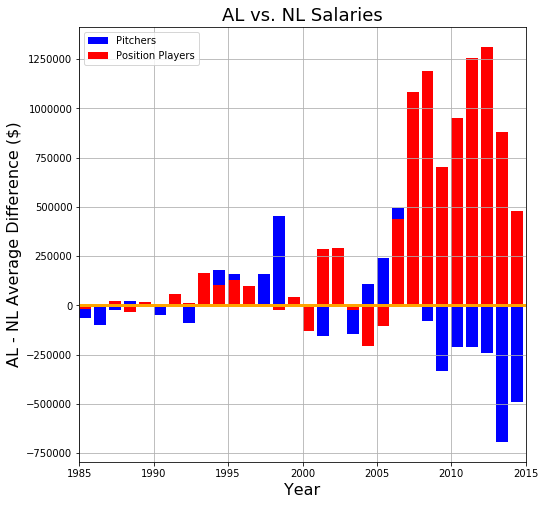

In [38]:
#Graph Pitchers vs. Position players salaries
fig,ax = plt.subplots(figsize = (8,8))
x_axis = difference_df.index
y_axis = difference_df['P']
players = difference_df['Position Players Average']
pitcher_bar = ax.bar(x_axis,y_axis,label='Pitchers',color = 'b',align='edge')
player_bar = ax.bar(x_axis,players,label = "Position Players",color='r',align = 'edge')
plt.plot(x_axis, [0 for _ in range(len(x_axis))], color = "orange",linewidth = 3)
ax.legend(loc = 'best')
ax.set_title('AL vs. NL Salaries',size = 18)
ax.set_ylabel('AL - NL Average Difference ($)',size = 16)
ax.set_xlabel('Year',size = 16)
ax.set_xlim(1985,2015)
ax.grid()
ax.plot
plt.savefig('Salaries.png')
print(f'In recent years the AL pays their position players substancially more than the NL, while the NL pays their pitchers more than the AL.')

In [16]:
#Pull DH vs AL vs NL Pitcher data
new_df = summary_table1['DH']
new_df = new_df.drop(columns=['NL'])
new_df = new_df.rename(columns={'AL':'DH'})
new_df2 = summary_table1['P']
summary_table2 = pd.merge(new_df,new_df2,on = 'yearID')
summary_table2.head()
new_df3 = summary_table2.loc[2000:2015,:]
new_df.head()

lgID,DH
yearID,
1985,557288.896302
1986,543915.829352
1987,602024.020048
1988,613726.704648
1989,708136.952522


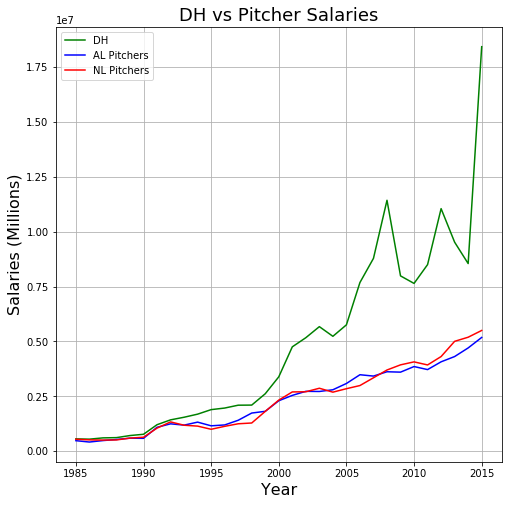

In [39]:
#Graph DH vs Pitcher data
x_axis = summary_table2.index
data1 = summary_table2['DH']
data2 = summary_table2['AL']
data3 = summary_table2['NL']
fig,ax = plt.subplots(figsize = (8,8))
hitter = ax.plot(x_axis,data1,color = 'g')
american = ax.plot(x_axis,data2,label = 'AL Pitchers',color = 'b')
national = ax.plot(x_axis,data3,label = 'NL Pitchers',color = 'r')
ax.legend(loc='best')
ax.set_title('DH vs Pitcher Salaries',size = 18)
ax.set_xlabel('Year',size = 16)
ax.set_ylabel('Salaries (Millions)',size = 16)
ax.grid()
plt.savefig('DH_salaries.png')
plt.show()